<h2 style='color:purple' align='center'>Training And Testing Available Data</h2>

<p><b>We have a dataset containing different income heads in an Officers' Mess. We are going to analyze this dataset
and build a prediction function that can predict Growth-rate by taking these income heads 
as input. We will use sklearn train_test_split method to split training and testing dataset</b></p>

In [16]:
import pandas as pd
df = pd.read_excel(r"C:\Users\lom\Desktop\income.xlsx"),
df.head()

,Income,Contribution (SCB),Gift Income (Maint),IAFBA Accrued intrest,Intrest on SBI (Maint),Lighting Charges,Misc (SCB),Room Kit,Room Rent,Share of Profit (URC),...,Prepaid Insurance,Auction of WOC items,Intrest on IAFBA,Lenen charges,Maint income,Room item charges,Misc Income,Balance C/F,Total,Growth
0,2017-18,4800,7125,115495,29905,27065,0,0,2489996,600000,...,1645,500,38324,1404,0,0,0,0.00,3829571.00,9.27
1,2018-19,8300,8458,463250,18674,3200,31390,762,2158991,750000,...,0,0,0,0,0,0,0,0.00,3480395.00,5.11
2,2019-20,9600,0,453031,10437,0,96,0,1920675,500000,...,0,400,0,8760,3600,19410,7,177005.48,3144106.48,1.99
3,2020-2021,5700,0,391774,62894,0,0,0,1733391,400000,...,0,1950,0,6879,162,52994,30012,130206.36,2855557.36,1.16


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

# Bar Chart (Year v/s Growth-Rate)

Text(0.5, 1.0, 'Growth-Rate')

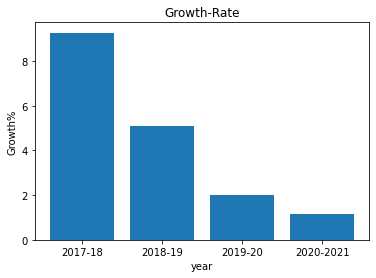

In [18]:
plt.bar(df['Income'],df['Growth'])
plt.xlabel("year")
plt.ylabel("Growth%")
plt.title("Growth-Rate")

**Looking at above Bar-Chart,we can clearly make out that there is declining pattern. This decline may be attributed to any of the income factors. Let us device a method to predict Growth-rate based on various income factors. 

<p style='color:purple'><b>The approach we are going to use here is to split available data in two sets</b></p>
    <ol>
        <b>
        <li>Training: We will train our model on this dataset</li>
        <li>Testing: We will use this subset to make actual predictions using trained model</li>
        </b>
     </ol>
<p style='color:purple'><b>The reason we don't use same training set for testing is because our model has seen those samples before, using same samples for making predictions might give us wrong impression about accuracy of our model. It is like you ask same questions in exam paper as you taught the students in the class.
</b></p>

In [69]:
X = df[['Room Rent']]

In [70]:
y = df['Growth']

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) 

In [83]:
X_train

,Room Rent
0,2489996
3,1733391
2,1920675


In [84]:
X_test

,Room Rent
1,2158991


In [85]:
y_train

0    9.27
3    1.16
2    1.99
Name: Growth, dtype: float64

In [86]:
y_test

1    5.11
Name: Growth, dtype: float64

**Lets run linear regression model now**

In [87]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train,y_train)

LinearRegression()

In [88]:
X_test

,Room Rent
1,2158991


In [89]:
clf.predict(X_test)

array([5.38306516])

In [90]:
y_test

1    5.11
Name: Growth, dtype: float64

# It can be seen that model predicted the Growth % as 5.38306516 as compared to actual 5.11. This suggests that model is fairly accurate for the dataset. Further, prediction for any year can be made by following steps:

**random_state argument**

In [92]:
clf.predict([['1500000']])

C:\Users\lom\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


array([-1.99880646])

# A low Room-Rent income(15,00,000), will definitely impact the Growth-rate in a negative manner. This model is good for analysing a linear relation between one INDEPENDENT & one DEPENDENT variable. This will help in studying the impact of each income-head towards Growth-rate.

# However, growth-rate in an NPF is calculated over MULTIPLE_INDEPENDENT & one DEPENDENT variable. 

In [94]:
import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(df[['Contribution (SCB)','Gift Income (Maint)','IAFBA Accrued intrest','Intrest on SBI (Maint)','Lighting Charges','Misc (SCB)','Room Kit','Room Rent','Share of Profit (URC)','Subscription (SCB)','Intrest on investment','DG collection','Prepaid Insurance','Auction of WOC items','Intrest on IAFBA','Lenen charges','Maint income','Room item charges','Misc Income','Balance C/F','Total']],df['Growth'])

LinearRegression()

In [95]:
reg.coef_

array([-1.68418556e-07,  2.04822741e-07, -3.79425369e-06,  1.79639037e-06,
        2.37515710e-07,  5.81319242e-07,  1.42378032e-08,  2.78372617e-06,
        2.44044864e-06, -1.58829154e-07,  3.04196685e-06,  1.05341030e-07,
        1.08020194e-08,  3.79375129e-08,  2.51657502e-07, -2.66294500e-07,
       -1.90173852e-07,  4.79577017e-07,  8.66188920e-07, -5.82090862e-06,
        2.45305315e-06])

In [96]:
reg.intercept_

-9.557245508367963

# reg.predict([[Prediction value for each income-head]])

# Above command will predict the Growth-rate based on value for each income-head